# Example notebook for Ensemble Timesereies  

##### This notebook demonsterates how the ensemble module can be used for 1D timesereies data from a single ensemble or multi-model ensemble memebers

In [1]:
import xarray as xr
import glob
from aqua.diagnostics.core import retrieve_merge_ensemble_data
from aqua.diagnostics import EnsembleTimeseries

In [2]:
# loading the paths of the data:
# Monthly timeseries data 
mon_file_list = glob.glob('/work/ab0995/a270260/pre_computed_aqua_analysis/*/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_*_historical-1990_mon.nc')
# Annual timeseries data
ann_file_list = glob.glob('/work/ab0995/a270260/pre_computed_aqua_analysis/*/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_*_historical-1990_ann.nc')

In [3]:
# Reteriveing and merging the datasets in monthly and annual ensembles
# Monthly:
# mon_model_dataset = retrieve_merge_ensemble_data(variable='2t', startdate='1990-01-01', enddate='1999-12-31', data_path_list=mon_file_list, log_level = "WARNING",ens_dim="ensemble")
# Annual:
# ann_model_dataset = retrieve_merge_ensemble_data(variable='2t', startdate='1990-01-01', enddate='1999-12-31', data_path_list=ann_file_list, log_level = "WARNING",ens_dim="ensemble")

In [4]:
# Reteriveing and merging the datasets in monthly and annual ensembles
# Monthly:
mon_model_dataset = retrieve_merge_ensemble_data(variable='2t', data_path_list=mon_file_list, log_level = "WARNING",ens_dim="ensemble")
# Annual:
ann_model_dataset = retrieve_merge_ensemble_data(variable='2t', data_path_list=ann_file_list, log_level = "WARNING",ens_dim="ensemble")

In [5]:
# loading the reference data as xarrays
variable='2t'

# Monthly reference data
ERA5_mon = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc'
mon_ref_data = xr.open_dataset(ERA5_mon,
                              drop_variables=[var for var in xr.open_dataset(ERA5_mon).data_vars if var != variable])
# selection ERA5 data on the same time interval -> xarray.DataArray 
mon_ref_data = mon_ref_data[variable].sel(time=slice(mon_model_dataset.time[0],mon_model_dataset.time[-1]))

# Annual reference data
ERA5_ann = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc'
ann_ref_data = xr.open_dataset(ERA5_ann,
                              drop_variables=[var for var in xr.open_dataset(ERA5_ann).data_vars if var != variable])
# selection ERA5 data on the same time interval -> xarray.DataArray 
ann_ref_data = ann_ref_data[variable].sel(time=slice(ann_model_dataset.time[0],ann_model_dataset.time[-1]))

In [6]:
# path on Lumi 
# ERA5 monthly data: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc
# ERA5 annual data: pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc

# IFS-NEMO monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_mon.nc 
# IFS-NEMO annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc

# IFS-FESOM monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_mon.nc
# IFS-FESOM annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_ann.nc

In [7]:
plot_options = {
    'plot_ensemble_members': True,
    'ensemble_label': 'Multi-model',
    'plot_title': 'Ensemble statistics for 2-meter temperature [K]',
    'ref_label': 'ERA5',
    'figure_size': [12,6],
    
}

In [8]:
var = '2t'

ts = EnsembleTimeseries(
    var=var,
    mon_model_dataset=mon_model_dataset,
    ann_model_dataset=ann_model_dataset,
    mon_ref_data=mon_ref_data,
    ann_ref_data=ann_ref_data,
    plot_options=plot_options
)

In [9]:
# var = '2t'
# ts = EnsembleTimeseries(
#     var=var,
#     mon_model_dataset=mon_model_dataset,
#     ann_model_dataset=ann_model_dataset,
#     plot_options=plot_options
# )

In [10]:
ts.compute_statistics()

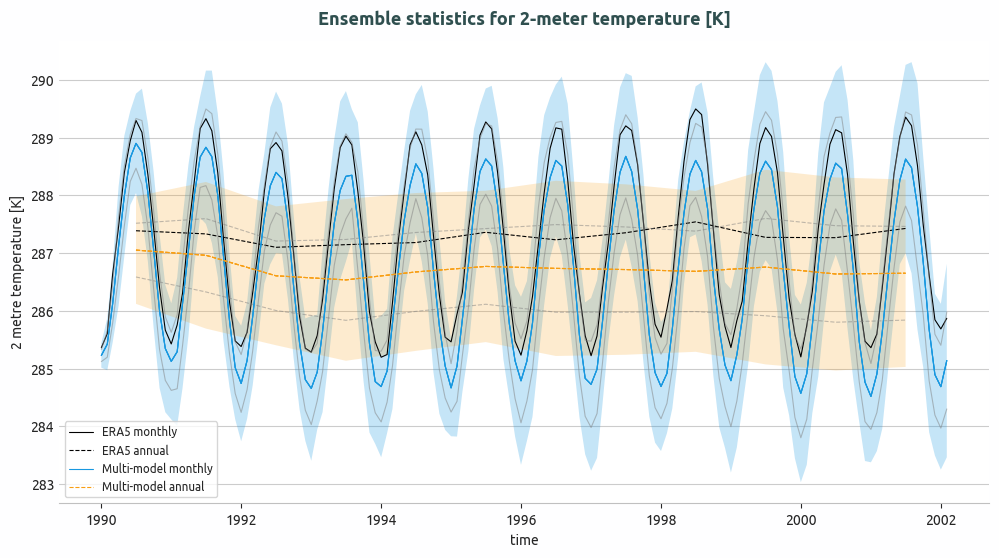

In [11]:
fig, ax = ts.plot()

In [12]:
ts.mon_ref_data

<xarray.DataArray '2t' (time: 146)> Size: 1kB
[146 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
Attributes:
    long_name:  2 metre temperature
    shortName:  2t
    code:       167
    table:      128
    units:      K
    cfVarName:  t2m
    history:    \n2024-07-25 19:24:39 AQUA💧: Variable renamed 2t by fixer;\n2...
    paramId:    167

In [16]:
ts.mon_dataset_std

<xarray.DataArray '2t' (time: 146)> Size: 1kB
array([0.10566489, 0.22584447, 0.33546808, 0.51616513, 0.5213877 ,
       0.40726922, 0.43099146, 0.55341417, 0.59920776, 0.67614461,
       0.66620621, 0.5519943 , 0.50297542, 0.64129449, 0.73535909,
       0.742014  , 0.60427763, 0.52590765, 0.66465966, 0.74679686,
       0.70838103, 0.72990672, 0.5756711 , 0.44757752, 0.50105815,
       0.50539125, 0.59569369, 0.63076655, 0.56442422, 0.6794596 ,
       0.69985994, 0.65071407, 0.6718115 , 0.62193999, 0.57369835,
       0.53039393, 0.62700811, 0.49838925, 0.70050981, 0.7435416 ,
       0.72708016, 0.77184308, 0.73849629, 0.57145003, 0.85158294,
       0.87174142, 0.77078779, 0.53967871, 0.61246328, 0.53833069,
       0.74261523, 0.66309937, 0.60774074, 0.64683885, 0.60301124,
       0.7667906 , 0.83226008, 0.88403904, 0.75788002, 0.55481677,
       0.41926984, 0.61118415, 0.62987343, 0.74786383, 0.69870067,
       0.57250113, 0.61060978, 0.6952057 , 0.75366646, 0.83047787,
       0.64686102, 0.65455502, 0.7284153 , 0.69257236, 0.81146011,
       0.87395256, 0.82277158, 0.69495302, 0.65728523, 0.77515399,
       0.87353098, 0.81518784, 0.70737403, 0.65851878, 0.74822343,
       0.76977035, 0.7150731 , 0.68041615, 0.73655788, 0.73568712,
       0.72069913, 0.82947403, 0.797355  , 0.8128882 , 0.70917317,
       0.60727615, 0.55973838, 0.51862304, 0.68823442, 0.76994103,
       0.61635277, 0.54742294, 0.64171925, 0.77489698, 0.83263493,
       0.85235065, 0.84803571, 0.71721719, 0.79585657, 0.80146556,
       0.77146577, 0.93095098, 0.83969305, 0.85173718, 0.85790862,
       0.85649428, 0.91630997, 1.02058431, 0.77336864, 0.7077386 ,
       0.77012569, 0.78877247, 0.75970117, 0.96962253, 0.94297201,
       0.79845069, 0.79236124, 0.89620585, 0.99253955, 0.94956845,
       0.69468962, 0.68371553, 0.57091173, 0.66807309, 0.83897117,
       0.82166613, 0.81655012, 0.72750279, 0.81624541, 0.91504259,
       1.06808305, 0.91254834, 0.88978208, 0.70071645, 0.7184877 ,
       0.83875185])
Coordinates:
  * time     (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
Attributes: (12/20)
    GRIB_paramId:                    167
    long_name:                       2 metre temperature
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                heightAboveGround
    standard_name:                   air_temperature
    ...                              ...
    history:                         \n2024-02-07 15:05:17 AQUA💧: resampled f...
    GRIB_NV:                         0
    gridtype:                        healpix
    GRIB_shortName:                  2t
    GRIB_units:                      K
    GRIB_dataType:                   fc

In [17]:
fig, ax

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Ensemble statistics for 2-meter temperature [K]'}, xlabel='time', ylabel='2 metre temperature [K]'>)